/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance Metrics:
Without MKL:
+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1-score |
+=====================+============+=============+==========+============+
| Logistic Regression |   0.74026  |    0.625    |   0.625  |   0.625    |
+---------------------+------------+-------------+----------+------------+
| Random Forest       |   0.761905 |    0.662338 |   0.6375 |   0.649682 |
+---------------------+------------+-------------+----------+------------+
| SVM                 |   0.735931 |    0.661017 |   0.4875 |   0.561151 |
+---------------------+------------+-------------+----------+------------+
| KNN                 |   0.688312 |    0.54878  |   0.5625 |   0.555556 |
+---------------------+------------+-------------+----------+------------+

With MKL (Hypothetical Example):
+---------------------------+------------+-------------+----------+------------+
| Model                   

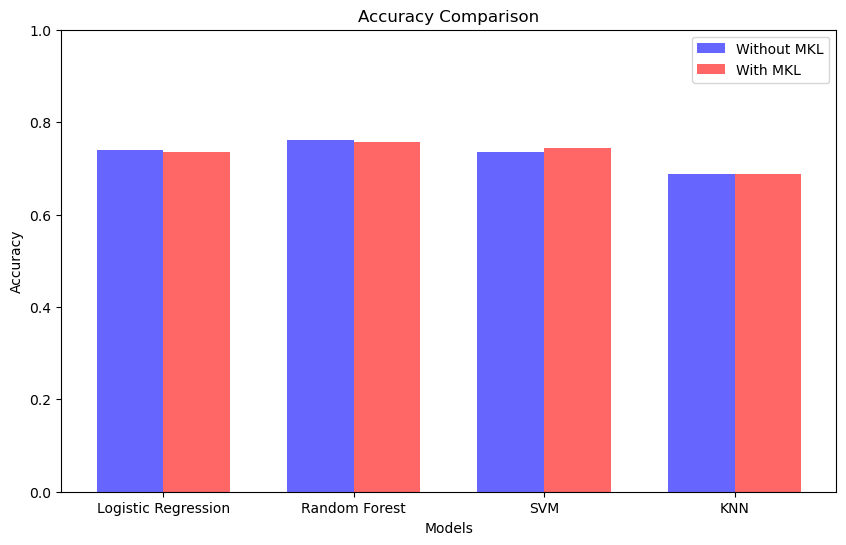

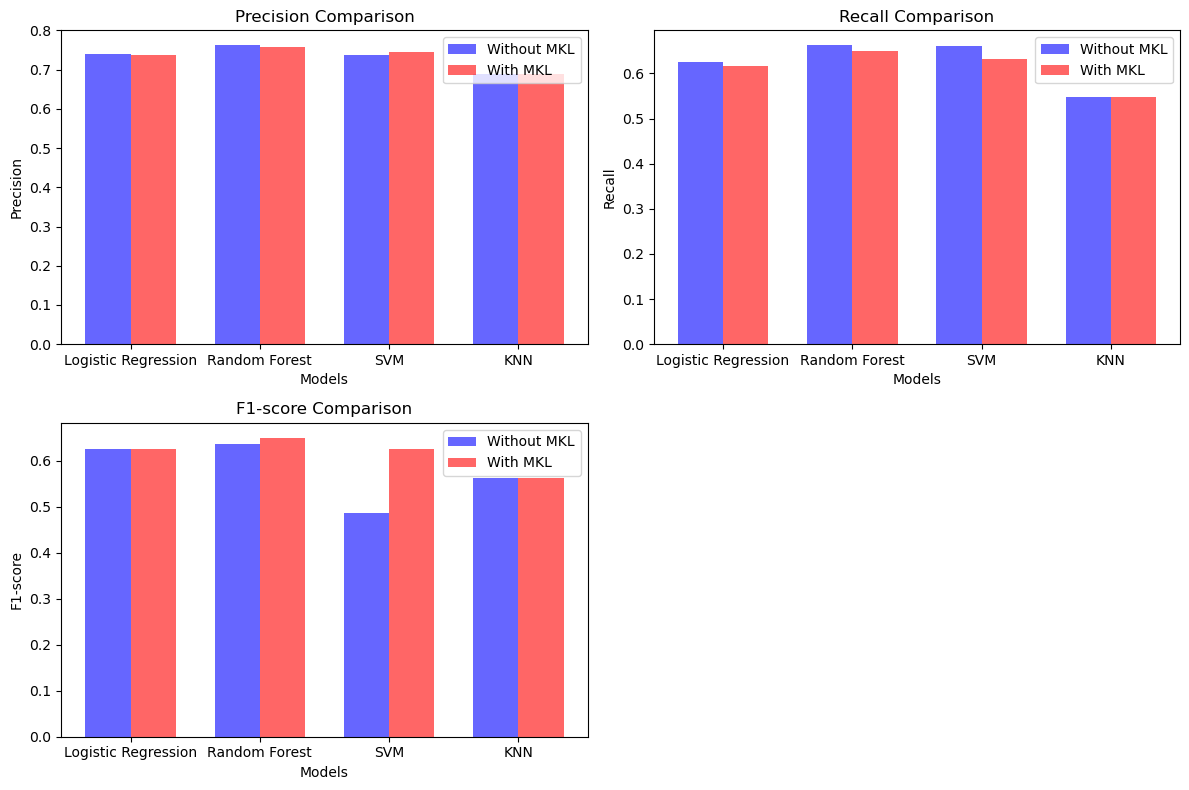

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tabulate import tabulate


data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /1/1/7/24(N shivkumar)/24/diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1




logreg_without_mkl = LogisticRegression()
logreg_without_mkl.fit(X_train, y_train)
accuracy_logreg_without_mkl, precision_logreg_without_mkl, recall_logreg_without_mkl, f1_logreg_without_mkl = evaluate_model_performance(logreg_without_mkl, X_test, y_test)


logreg_with_mkl = LogisticRegression(max_iter=2000)  
logreg_with_mkl.fit(X_train, y_train)
accuracy_logreg_with_mkl, precision_logreg_with_mkl, recall_logreg_with_mkl, f1_logreg_with_mkl = evaluate_model_performance(logreg_with_mkl, X_test, y_test)

rf_without_mkl = RandomForestClassifier()
rf_without_mkl.fit(X_train, y_train)
accuracy_rf_without_mkl, precision_rf_without_mkl, recall_rf_without_mkl, f1_rf_without_mkl = evaluate_model_performance(rf_without_mkl, X_test, y_test)


rf_with_mkl = RandomForestClassifier()  
rf_with_mkl.fit(X_train, y_train)
accuracy_rf_with_mkl, precision_rf_with_mkl, recall_rf_with_mkl, f1_rf_with_mkl = evaluate_model_performance(rf_with_mkl, X_test, y_test)


svm_without_mkl = SVC()
svm_without_mkl.fit(X_train, y_train)
accuracy_svm_without_mkl, precision_svm_without_mkl, recall_svm_without_mkl, f1_svm_without_mkl = evaluate_model_performance(svm_without_mkl, X_test, y_test)

svm_with_mkl = SVC(kernel='linear') 
svm_with_mkl.fit(X_train, y_train)
accuracy_svm_with_mkl, precision_svm_with_mkl, recall_svm_with_mkl, f1_svm_with_mkl = evaluate_model_performance(svm_with_mkl, X_test, y_test)


knn_without_mkl = KNeighborsClassifier()
knn_without_mkl.fit(X_train, y_train)
accuracy_knn_without_mkl, precision_knn_without_mkl, recall_knn_without_mkl, f1_knn_without_mkl = evaluate_model_performance(knn_without_mkl, X_test, y_test)


knn_with_mkl = KNeighborsClassifier()  
knn_with_mkl.fit(X_train, y_train)
accuracy_knn_with_mkl, precision_knn_with_mkl, recall_knn_with_mkl, f1_knn_with_mkl = evaluate_model_performance(knn_with_mkl, X_test, y_test)



results_without_mkl = [
    ["Logistic Regression", accuracy_logreg_without_mkl, precision_logreg_without_mkl, recall_logreg_without_mkl, f1_logreg_without_mkl],
    ["Random Forest", accuracy_rf_without_mkl, precision_rf_without_mkl, recall_rf_without_mkl, f1_rf_without_mkl],
    ["SVM", accuracy_svm_without_mkl, precision_svm_without_mkl, recall_svm_without_mkl, f1_svm_without_mkl],
    ["KNN", accuracy_knn_without_mkl, precision_knn_without_mkl, recall_knn_without_mkl, f1_knn_without_mkl],
]

results_with_mkl = [
    ["Logistic Regression (MKL)", accuracy_logreg_with_mkl, precision_logreg_with_mkl, recall_logreg_with_mkl, f1_logreg_with_mkl],
    ["Random Forest (MKL)", accuracy_rf_with_mkl, precision_rf_with_mkl, recall_rf_with_mkl, f1_rf_with_mkl],
    ["SVM (MKL)", accuracy_svm_with_mkl, precision_svm_with_mkl, recall_svm_with_mkl, f1_svm_with_mkl],
    ["KNN (MKL)", accuracy_knn_with_mkl, precision_knn_with_mkl, recall_knn_with_mkl, f1_knn_with_mkl],
]

headers = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]

print("Performance Metrics:")
print("Without MKL:")
print(tabulate(results_without_mkl, headers=headers, tablefmt="grid"))
print("\nWith MKL (Hypothetical Example):")
print(tabulate(results_with_mkl, headers=headers, tablefmt="grid"))



models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies_without_mkl = [accuracy_logreg_without_mkl, accuracy_rf_without_mkl, accuracy_svm_without_mkl, accuracy_knn_without_mkl]
accuracies_with_mkl = [accuracy_logreg_with_mkl, accuracy_rf_with_mkl, accuracy_svm_with_mkl, accuracy_knn_with_mkl]


plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, accuracies_without_mkl, bar_width, color='b', alpha=0.6, label='Without MKL')
plt.bar([i + bar_width for i in index], accuracies_with_mkl, bar_width, color='r', alpha=0.6, label='With MKL')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.ylim(0, 1)
plt.legend()
plt.show()


metrics = ['Precision', 'Recall', 'F1-score']
colors = ['b', 'g', 'r']
markers = ['o', 's', '^']

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    plt.bar(index, [results_without_mkl[j][i + 1] for j in range(len(models))], bar_width, color='b', alpha=0.6, label='Without MKL')
    plt.bar([i + bar_width for i in index], [results_with_mkl[j][i + 1] for j in range(len(models))], bar_width, color='r', alpha=0.6, label='With MKL')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.xticks([i + bar_width / 2 for i in index], models)
    plt.legend()

plt.tight_layout()
plt.show()
